When degree is 5, the solution is: 
[[  1566.44843048]
 [ -7699.43953191]
 [ 13290.5728574 ]
 [-10566.88165571]
 [  3963.32198644]
 [  -567.20484658]]
16276.308185471911
0.9975296445623049


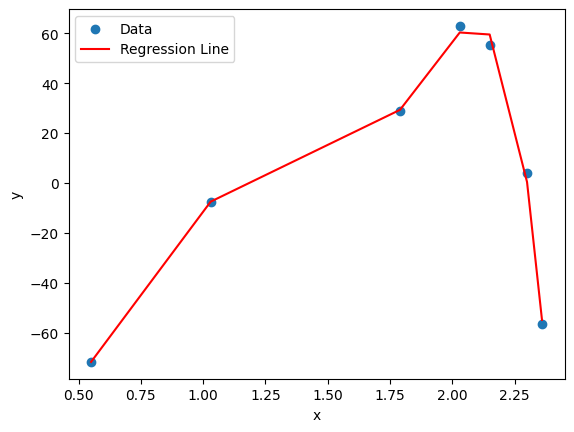

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# find sum given an exponent
def findSum(exp, arrX, arrY=None):
    sum = 0
    if arrY is None:
        for i in arrX:
            sum += i**exp
    else:
        for i in range(0, len(arrX)):
            sum += (arrX[i] ** exp) * arrY[i]
    return sum


# find xi^n from 0 to 5 and find the sums of them
def buildSystem(arrX, arrY, n):
    # build the left side of the system
    for i in range(0, n + 1):
        for j in range(i, n + i + 1):
            leftHandSide[i][j - i] = findSum(j, arrX)
    # build the right side of the system
    for i in range(0, n + 1):
        rightHandSide[i][0] = findSum(i, arrX, arrY)


# build a system of equations and solve


# find a least squares polynomial for degree 1, 2, and 3
def rrPlot(x, y, n, leftHandSide, rightHandSide):
    # compute the left and right hand side equations
    buildSystem(x, y, n)
    # now that we have our system, we need to solve for a0 to a(n)
    sol = np.linalg.solve(leftHandSide, rightHandSide)
    print("When degree is " + str(n) + ", the solution is: ")
    print(sol)
    # now we need to find SSres, SSreg, and SStot for the new equation
    y_hat = 0
    for i in range(0, n + 1):
        y_hat += sol[i] * (x**i)
    residuals = y - y_hat
    SSres = np.sum(residuals**2)
    y_mean = np.mean(y)
    SSreg = np.sum((y_hat - y_mean) ** 2)
    SStot = SSres + SSreg
    print(SStot)
    rSquared = SSreg / SStot
    print(rSquared)
    # now print the data
    plt.scatter(x, y, label="Data")
    plt.plot(x, y_hat, color="red", label="Regression Line")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()

    plt.show()


x = np.array([0.55, 1.03, 1.79, 2.03, 2.15, 2.30, 2.36])
y = np.array([-71.79, -7.5, 28.89, 62.97, 55.43, 4.0, -56.67])
n = 5
leftHandSide = np.zeros((n + 1, n + 1))
rightHandSide = np.zeros((n + 1, 1))
rrPlot(x, y, n, leftHandSide, rightHandSide)
